
<h2>Etapa da metodologia CRISP-DM: Data Understanding, Data Preparation</h2>
<h3>Trabalho Final - Entrega Parcial</h3>    

<hr style="height:2px"> 


## Descrição

Dado a correlação entre dois conjuntos de dados, Perfil do Candidato 2022 e Motivo Cassação2022, dentro do escopo dos estados do Sudeste do Brasil,pretendemos calculara porcentagem de candidatos com conduta antiética cujos mandatos foram cassados. Além disso, buscamos descobrir quais partidos possuem a maior quantidade de candidatos cassados e analisar se isso implica em sua popularidade. Por fim, traçar padrões nos perfis dos candidatos cassados, como nível de instrução, ocupação e cargo disputado para entender se há correlações entre seus perfis e as razões para a perdado mandato.

---
## Preparação dos dados

In [144]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import os
import codecs

Em seguida, os dados serão carregados do arquivo para um DataFrame pandas.

In [145]:
# Candidatos
df_ES = pd.read_csv('dados_limpos/cassacao_cand_ES.csv', sep=',', encoding='iso-8859-1')
df_MG = pd.read_csv('dados_limpos/cassacao_cand_MG.csv', sep=',', encoding='iso-8859-1')
df_RJ = pd.read_csv('dados_limpos/cassacao_cand_RJ.csv', sep=',', encoding='iso-8859-1')
df_SP = pd.read_csv('dados_limpos/cassacao_cand_SP.csv', sep=',', encoding='iso-8859-1')

# Concatenar os DataFrames
df = pd.concat([df_ES, df_MG, df_RJ, df_SP], ignore_index=True)

# Salvar o DataFrame concatenado em um novo arquivo CSV com codificação utf-8
df.to_csv('dados_limpos/candidatos_concatenados_utf8.csv', index=False, encoding='utf-8', sep=';')

Sendo as 10 primeiras linhas:

In [146]:
# exibe o dataframe
print(df.head(n=10).to_string(index=False))

 SQ_CANDIDATO                 NM_CANDIDATO SG_PARTIDO          DS_CARGO             DS_GRAU_INSTRUCAO SG_UF DS_GENERO DS_COR_RACA                          DS_OCUPACAO DS_SIT_TOT_TURNO                     DS_TP_MOTIVO                          DS_MOTIVO
  80001719702         JOSÉ CARLOS NOGUEIRA    PC do B DEPUTADO ESTADUAL ENSINO FUNDAMENTAL INCOMPLETO    ES MASCULINO       PARDA                           AGRICULTOR           #NULO# Fundamentos legais de julgamento Ausência de requisito de registro 
  80001652388    ANTONIO BELMIRO GONÇALVES        PMB DEPUTADO ESTADUAL         ENSINO MÉDIO COMPLETO    ES MASCULINO       PRETA APOSENTADO (EXCETO SERVIDOR PÚBLICO)       NÃO ELEITO Fundamentos legais de julgamento Ausência de requisito de registro 
  80001651646 HENRIQUE ZANOTELLI DE VARGAS   PATRIOTA DEPUTADO ESTADUAL             SUPERIOR COMPLETO    ES MASCULINO      BRANCA                               MÉDICO       NÃO ELEITO Fundamentos legais de julgamento             Ficha limpa (LC

- SQ_CANDIDATO (Sequência do Candidato) - Qualitativa Nominal: Identifica o candidato, mas não possui uma ordem lógica.
- NM_CANDIDATO (Nome do Candidato) - Qualitativa Nominal: Nome do candidato, sem ordem numérica.
- SG_PARTIDO (Sigla do Partido) - Qualitativa Nominal: Representa o partido, sem ordem entre os valores.
- DS_CARGO (Descrição do Cargo) - Qualitativa Nominal: Define o cargo disputado pelo candidato, sem ordem lógica.
- DS_GRAU_INSTRUCAO (Descrição do Grau de Instrução) - Qualitativa Ordinal: Representa o nível de instrução, com uma hierarquia natural entre os níveis (ex.: ensino fundamental < ensino médio < ensino superior).
- SG_UF (Sigla da Unidade Federativa) - Qualitativa Nominal: Representa o estado em que o candidato está concorrendo, sem ordem.
- DS_GENERO (Descrição do Gênero) - Qualitativa Nominal: Identifica o gênero do candidato, sem ordem.
- DS_COR_RACA (Descrição de Cor/Raça) - Qualitativa Nominal: Indica a autodeclaração de raça/cor do candidato, sem ordem.
- DS_OCUPACAO (Descrição da Ocupação) - Qualitativa Nominal: Profissão ou ocupação do candidato, sem hierarquia lógica.
- DS_SIT_TOT_TURNO (Descrição da Situação Total no Turno) - Qualitativa Nominal: Estado da candidatura no turno, como "eleito" ou "não eleito", sem hierarquia.
- DS_TP_MOTIVO (Tipo de Motivo da Cassação) - Qualitativa Nominal: Classifica o tipo de motivo para a cassação, sem uma ordem lógica.
- DS_MOTIVO (Motivo da Cassação) - Qualitativa Nominal: Detalha o motivo específico da cassação, sem uma ordem natural.

# Total de cassação

In [147]:
# Total de instâncias (número de registros no DataFrame)

# Cálculo do número de cassações por estado como exemplo de coluna numérica
cassacoes_por_estado = pd.DataFrame(df.groupby('SG_UF').size().reset_index(name="TOTAL").sort_values(by="TOTAL", ascending=False))
print(f"\nTotal de cassações por estado: \n{cassacoes_por_estado}")

total_instancias = cassacoes_por_estado.shape[0]
print(f"\nTotal de instâncias: {total_instancias}")

# Média e desvio padrdisplay(cassacoes_por_ocupacao.describe().round(8))ão para o total de cassações por estado
media_cassacoes = cassacoes_por_estado['TOTAL'].mean()
print(f"\nMédia de cassações por estado: {media_cassacoes}")
desvio_padrao_cassacoes = cassacoes_por_estado['TOTAL'].std()
print(f"\nDesvio padrão de cassações por estado: {desvio_padrao_cassacoes}")

display(cassacoes_por_estado.describe().round(8))


Total de cassações por estado: 
  SG_UF  TOTAL
3    SP    368
2    RJ    143
1    MG     83
0    ES     30

Total de instâncias: 4

Média de cassações por estado: 156.0

Desvio padrão de cassações por estado: 148.68086628749512


,TOTAL
count,4.000000
mean,156.000000
std,148.680866
min,30.000000
25%,69.750000
50%,113.000000
75%,199.250000
max,368.000000


# Estado mais cassado*

In [148]:
# Agrupar por estado e contar o total de cassações por estado
# print("\nEstado com mais candidatos cassados:")
# cassacoes_por_estado = df.groupby('SG_UF').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False).head(1)
# print(cassacoes_por_estado)

# # Total de instâncias (número de estados)
# total_instancias = cassacoes_por_estado.shape[0]
# print(f"Total de estados com cassações registradas: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por estado
# media_cassacoes = cassacoes_por_estado['total_cassados'].mean()
# desvio_padrao_cassacoes = cassacoes_por_estado['total_cassados'].std()

# print(f"Média de cassações por estado: {media_cassacoes}")
# print(f"Desvio padrão de cassações por estado: {desvio_padrao_cassacoes}")

# Cassação por partido

In [149]:
# Agrupar por partido e contar o número de cassações por partido
cassacoes_por_partido = pd.DataFrame(df.groupby('SG_PARTIDO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por partido: \n{cassacoes_por_partido}")

# Total de instâncias (número de partidos com cassações)
total_instancias = cassacoes_por_partido.shape[0]
print(f"Total de partidos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por partido
media_cassacoes = cassacoes_por_partido['TOTAL'].mean()
desvio_padrao_cassacoes = cassacoes_por_partido['TOTAL'].std()

print(f"Média de cassações por partido: {media_cassacoes}")
print(f"Desvio padrão de cassações por partido: {desvio_padrao_cassacoes}")

display(cassacoes_por_partido.describe().round(8))

Cassação por partido: 
       SG_PARTIDO  TOTAL
23            PTB    113
15           PROS     90
3              DC     59
16           PRTB     51
0            AGIR     31
8             PCO     30
17            PSB     26
11            PMB     23
5        PATRIOTA     22
12            PMN     17
9             PDT     17
1          AVANTE     17
28          UNIÃO     16
10             PL     13
26   REPUBLICANOS     12
14             PP     12
19            PSD     10
18            PSC     10
4             MDB      9
20           PSDB      8
27  SOLIDARIEDADE      7
25           REDE      7
13           PODE      6
24             PV      6
2       CIDADANIA      4
21           PSOL      4
22             PT      2
6         PC do B      1
7             PCB      1
Total de partidos com candidatos cassados: 29
Média de cassações por partido: 21.517241379310345
Desvio padrão de cassações por partido: 26.191084483158402


,TOTAL
count,29.000000
mean,21.517241
std,26.191084
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,113.000000


# Distribuição de Motivos de Cassação

In [150]:
# Agrupar por motivo de cassação e contar o número de ocorrências de cada motivo
cassacoes_por_motivo = pd.DataFrame(df.groupby('DS_MOTIVO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Motivos de cassação: \n{cassacoes_por_motivo}")

# Total de instâncias (número de motivos únicos de cassação)
total_instancias = cassacoes_por_motivo.shape[0]
print(f"Total de motivos de cassação distintos: {total_instancias}")

# Cálculo da média e desvio padrão para o total de ocorrências por motivo de cassação
media_ocorrencias = cassacoes_por_motivo['TOTAL'].mean()
desvio_padrao_ocorrencias = cassacoes_por_motivo['TOTAL'].std()

print(f"Média de ocorrências por motivo de cassação: {media_ocorrencias}")
print(f"Desvio padrão de ocorrências por motivo de cassação: {desvio_padrao_ocorrencias}")

display(cassacoes_por_motivo.describe().round(8))

Motivos de cassação: 
                                           DS_MOTIVO  TOTAL
2                 Ausência de requisito de registro     386
1                            Abuso de poder político    147
3                             Ficha limpa (LC 64/90)     71
4  Indeferimento de partido, federação ou coligação.     19
0                          Abuso de poder (LC 64/90)      1
Total de motivos de cassação distintos: 5
Média de ocorrências por motivo de cassação: 124.8
Desvio padrão de ocorrências por motivo de cassação: 156.63077603076604


,TOTAL
count,5.000000
mean,124.800000
std,156.630776
min,1.000000
25%,19.000000
50%,71.000000
75%,147.000000
max,386.000000


# Cassações por Grau de Instrução

In [151]:
# Agrupar por grau de instrução e contar o número de cassações por grau de instrução
cassacoes_por_instrucao = pd.DataFrame(df.groupby('DS_GRAU_INSTRUCAO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por grau de instrução: \n{cassacoes_por_instrucao}")

# Total de instâncias (número de graus de instrução com cassações registradas)
total_instancias = cassacoes_por_instrucao.shape[0]
print(f"Total de graus de instrução com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por grau de instrução
media_cassacoes_instrucao = cassacoes_por_instrucao['TOTAL'].mean()
desvio_padrao_cassacoes_instrucao = cassacoes_por_instrucao['TOTAL'].std()

print(f"Média de cassações por grau de instrução: {media_cassacoes_instrucao}")
print(f"Desvio padrão de cassações por grau de instrução: {desvio_padrao_cassacoes_instrucao}")

display(cassacoes_por_instrucao.describe().round(8))

Cassação por grau de instrução: 
               DS_GRAU_INSTRUCAO  TOTAL
5              SUPERIOR COMPLETO    266
2          ENSINO MÉDIO COMPLETO    196
6            SUPERIOR INCOMPLETO     68
0    ENSINO FUNDAMENTAL COMPLETO     46
1  ENSINO FUNDAMENTAL INCOMPLETO     30
3        ENSINO MÉDIO INCOMPLETO     13
4                   LÊ E ESCREVE      5
Total de graus de instrução com candidatos cassados: 7
Média de cassações por grau de instrução: 89.14285714285714
Desvio padrão de cassações por grau de instrução: 101.1441686759195


,TOTAL
count,7.000000
mean,89.142857
std,101.144169
min,5.000000
25%,21.500000
50%,46.000000
75%,132.000000
max,266.000000


# Cassações por Turno Eleitoral

In [152]:
# Agrupar por turno eleitoral e contar o número de cassações por turno
cassacoes_por_turno = pd.DataFrame(df.groupby('DS_SIT_TOT_TURNO').size().reset_index(name='TOTAL'))
print(f"Cassação por turno eleitoral: \n{cassacoes_por_turno}")

# Total de instâncias (número de turnos com cassações registradas)
total_instancias = cassacoes_por_turno.shape[0]
print(f"Total de turnos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por turno
media_cassacoes_turno = cassacoes_por_turno['TOTAL'].mean()
desvio_padrao_cassacoes_turno = cassacoes_por_turno['TOTAL'].std()

print(f"Média de cassações por turno: {media_cassacoes_turno}")
print(f"Desvio padrão de cassações por turno: {desvio_padrao_cassacoes_turno}")

display(cassacoes_por_turno.describe().round(8))

Cassação por turno eleitoral: 
  DS_SIT_TOT_TURNO  TOTAL
0           #NULO#    130
1       NÃO ELEITO    494
Total de turnos com candidatos cassados: 2
Média de cassações por turno: 312.0
Desvio padrão de cassações por turno: 257.3868683519033


,TOTAL
count,2.000000
mean,312.000000
std,257.386868
min,130.000000
25%,221.000000
50%,312.000000
75%,403.000000
max,494.000000


# Cassações por Ocupação Anterior

In [153]:
# Agrupar por ocupação anterior e contar o número de cassações por ocupação
cassacoes_por_ocupacao = pd.DataFrame(df.groupby('DS_OCUPACAO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por ocupação anterior: \n{cassacoes_por_ocupacao}")

# Total de instâncias (número de ocupações com cassações registradas)
total_instancias = cassacoes_por_ocupacao.shape[0]
print(f"Total de ocupações com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por ocupação
media_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].mean()
desvio_padrao_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].std()

print(f"Média de cassações por ocupação: {media_cassacoes_ocupacao}")
print(f"Desvio padrão de cassações por ocupação: {desvio_padrao_cassacoes_ocupacao}")

display(cassacoes_por_ocupacao.describe().round(8))

Cassação por ocupação anterior: 
                                          DS_OCUPACAO  TOTAL
57                                             OUTROS    150
34                                         EMPRESÁRIO    104
1                                            ADVOGADO     39
19                                        COMERCIANTE     32
7                APOSENTADO (EXCETO SERVIDOR PÚBLICO)     27
..                                                ...    ...
73  SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONIS...      1
80                    TRABALHADOR DE CONSTRUÇÃO CIVIL      1
83                   TÉCNICO DE LABORATÓRIO E RAIOS X      1
84                                TÉCNICO DE MECÂNICA      1
85                             TÉCNICO EM EDIFICAÇÕES      1

[89 rows x 2 columns]
Total de ocupações com candidatos cassados: 89
Média de cassações por ocupação: 7.01123595505618
Desvio padrão de cassações por ocupação: 19.660467014488326


,TOTAL
count,89.000000
mean,7.011236
std,19.660467
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,150.000000


# Estatísticas

Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [158]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar a normalização Min-Max à coluna 'TOTAL'
cassacoes_por_estado['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_estado[['TOTAL']])
display(cassacoes_por_estado.describe().round(8))

cassacoes_por_motivo['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_motivo[['TOTAL']])
display(cassacoes_por_motivo.describe().round(8))

cassacoes_por_partido['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_partido[['TOTAL']])
display(cassacoes_por_partido.describe().round(8))

cassacoes_por_instrucao['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_instrucao[['TOTAL']])
display(cassacoes_por_instrucao.describe().round(8))

cassacoes_por_turno['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_turno[['TOTAL']])
display(cassacoes_por_turno.describe().round(8))

cassacoes_por_ocupacao['TOTAL_NORMALIZADO'] = scaler.fit_transform(cassacoes_por_ocupacao[['TOTAL']])
display(cassacoes_por_ocupacao.describe().round(8))



,TOTAL,TOTAL_NORMALIZADO
count,4.000000,4.000000
mean,156.000000,0.372781
std,148.680866,0.439884
min,30.000000,0.000000
25%,69.750000,0.117604
50%,113.000000,0.245562
75%,199.250000,0.500740
max,368.000000,1.000000


,TOTAL,TOTAL_NORMALIZADO
count,5.000000,5.000000
mean,124.800000,0.321558
std,156.630776,0.406833
min,1.000000,0.000000
25%,19.000000,0.046753
50%,71.000000,0.181818
75%,147.000000,0.379221
max,386.000000,1.000000


,TOTAL,TOTAL_NORMALIZADO
count,29.000000,29.000000
mean,21.517241,0.183190
std,26.191084,0.233849
min,1.000000,0.000000
25%,7.000000,0.053571
50%,12.000000,0.098214
75%,23.000000,0.196429
max,113.000000,1.000000


,TOTAL,TOTAL_NORMALIZADO
count,7.000000,7.000000
mean,89.142857,0.322386
std,101.144169,0.387526
min,5.000000,0.000000
25%,21.500000,0.063218
50%,46.000000,0.157088
75%,132.000000,0.486590
max,266.000000,1.000000


,TOTAL,TOTAL_NORMALIZADO
count,2.000000,2.000000
mean,312.000000,0.500000
std,257.386868,0.707107
min,130.000000,0.000000
25%,221.000000,0.250000
50%,312.000000,0.500000
75%,403.000000,0.750000
max,494.000000,1.000000


,TOTAL,TOTAL_NORMALIZADO
count,89.000000,89.000000
mean,7.011236,0.040344
std,19.660467,0.131949
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.006711
75%,5.000000,0.026846
max,150.000000,1.000000


Podemos ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

# Detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

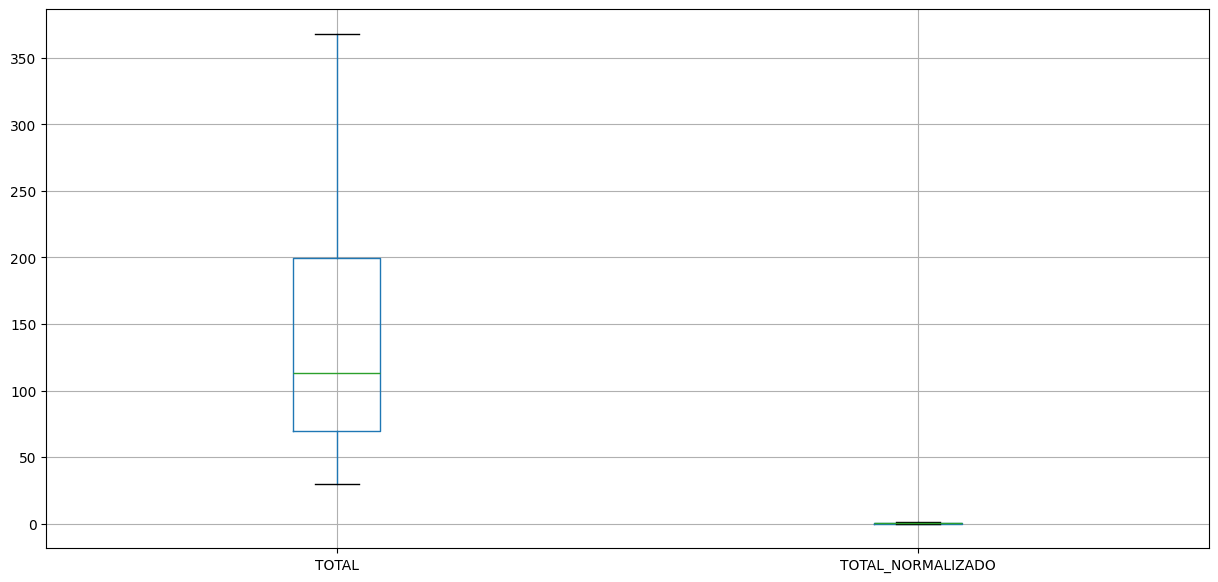

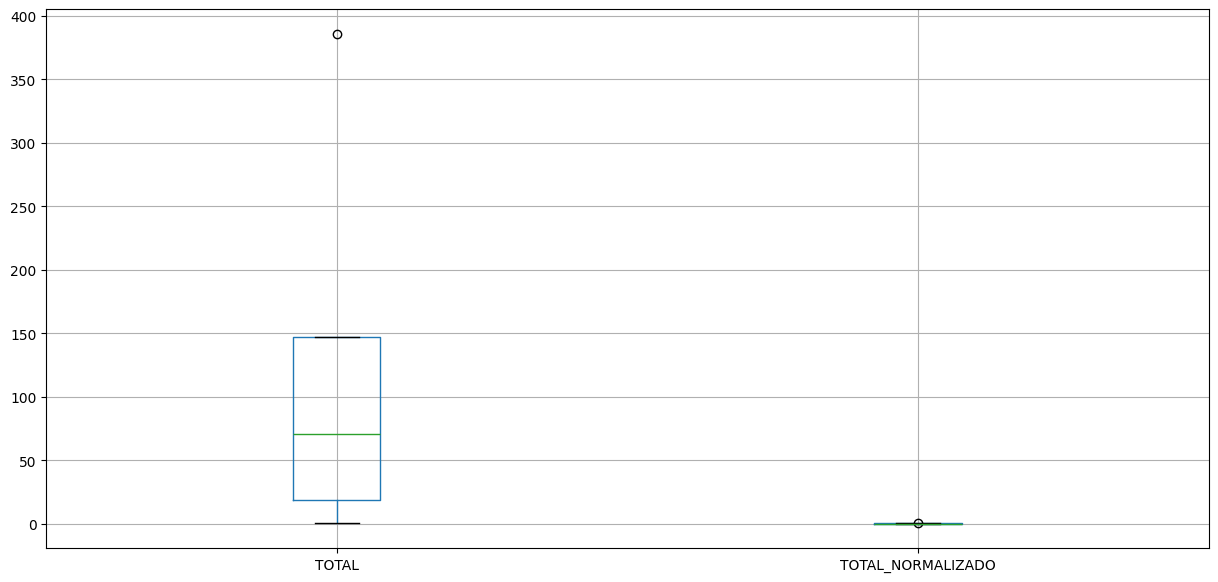

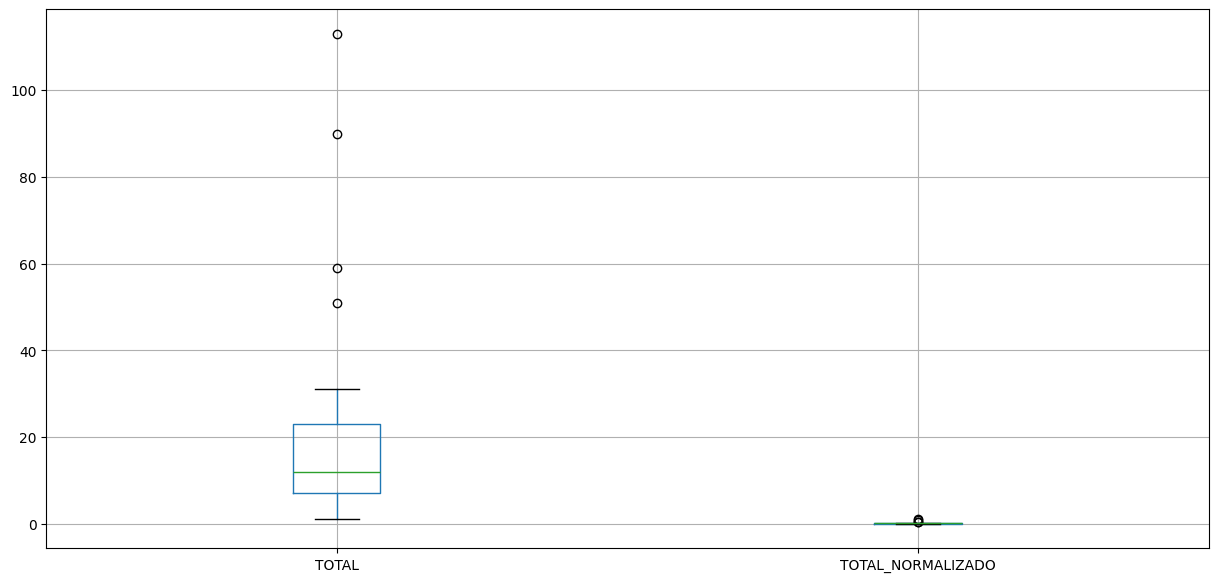

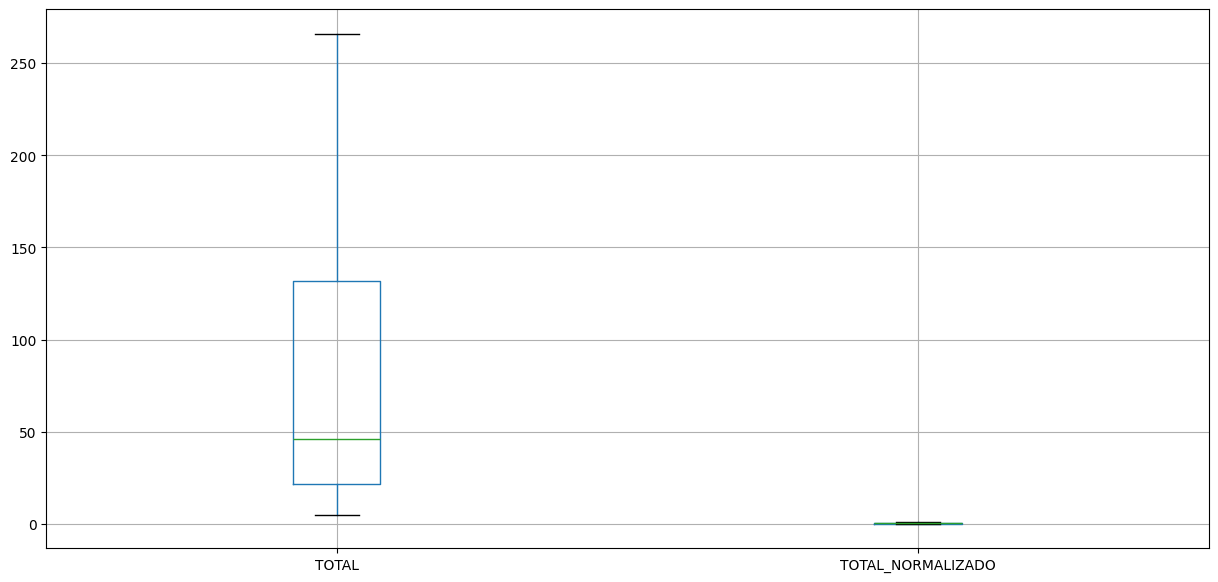

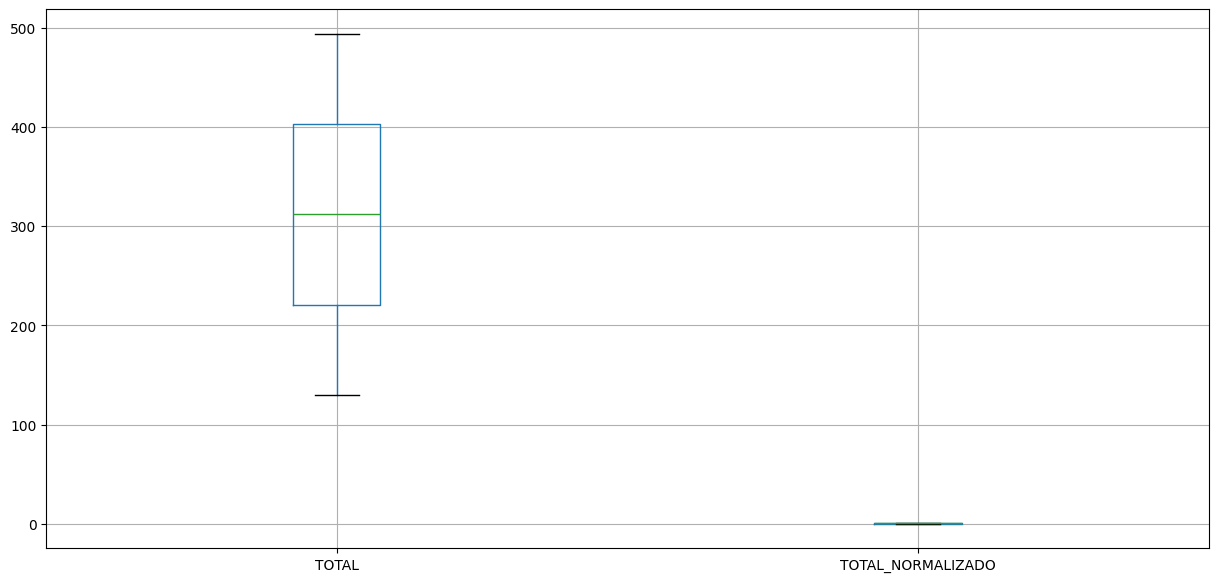

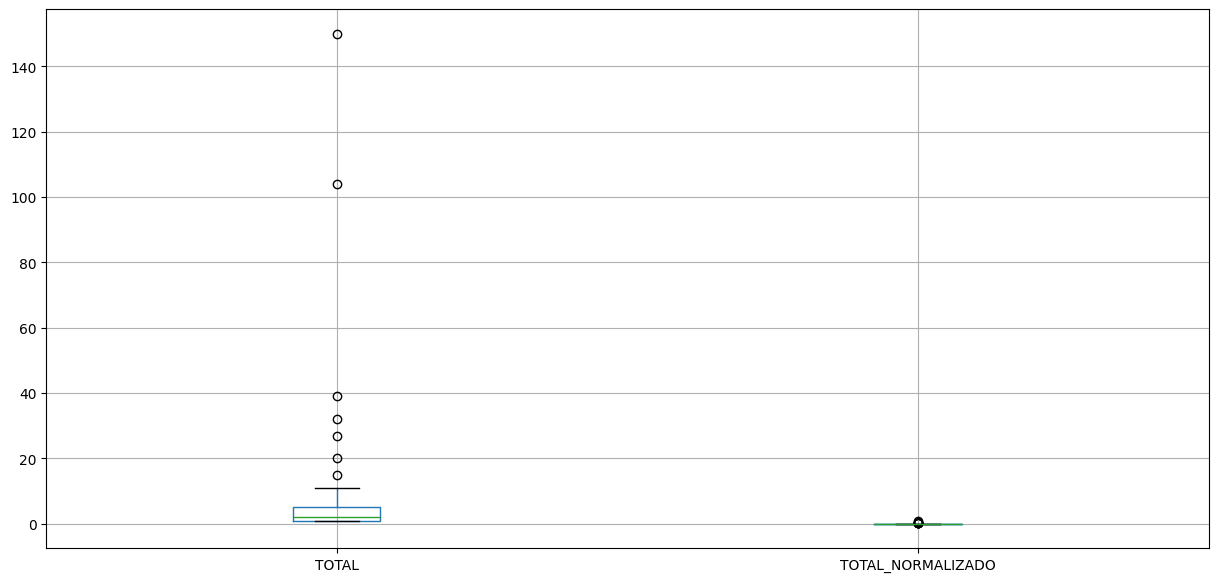

In [159]:
# gera um bloxplot para cada atributo
cassacoes_por_estado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_motivo.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_partido.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_instrucao.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_turno.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_ocupacao.boxplot(figsize=(15,7))
plt.show()


O box plot está indicando que os atributos `comprimento_sepala` e `largura_sepala` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois provavelmente tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Podemos plotar gráficos de dispersão a partir dos _dataframes_ utilizando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos.

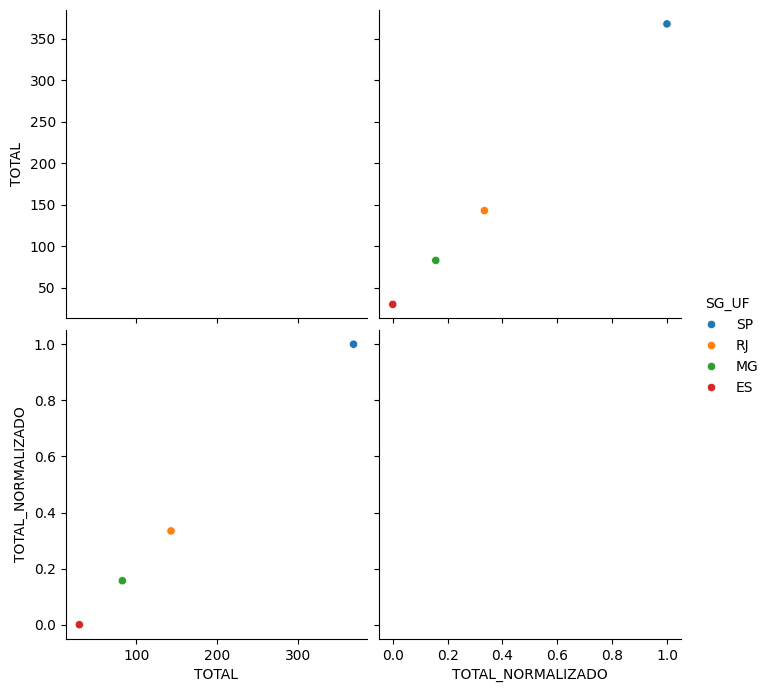

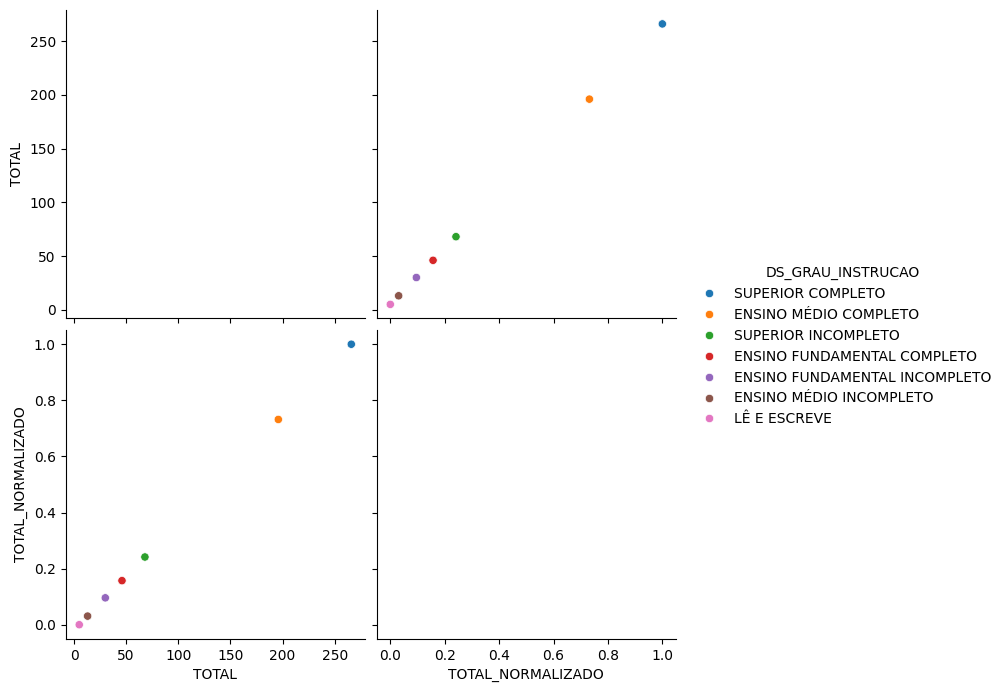

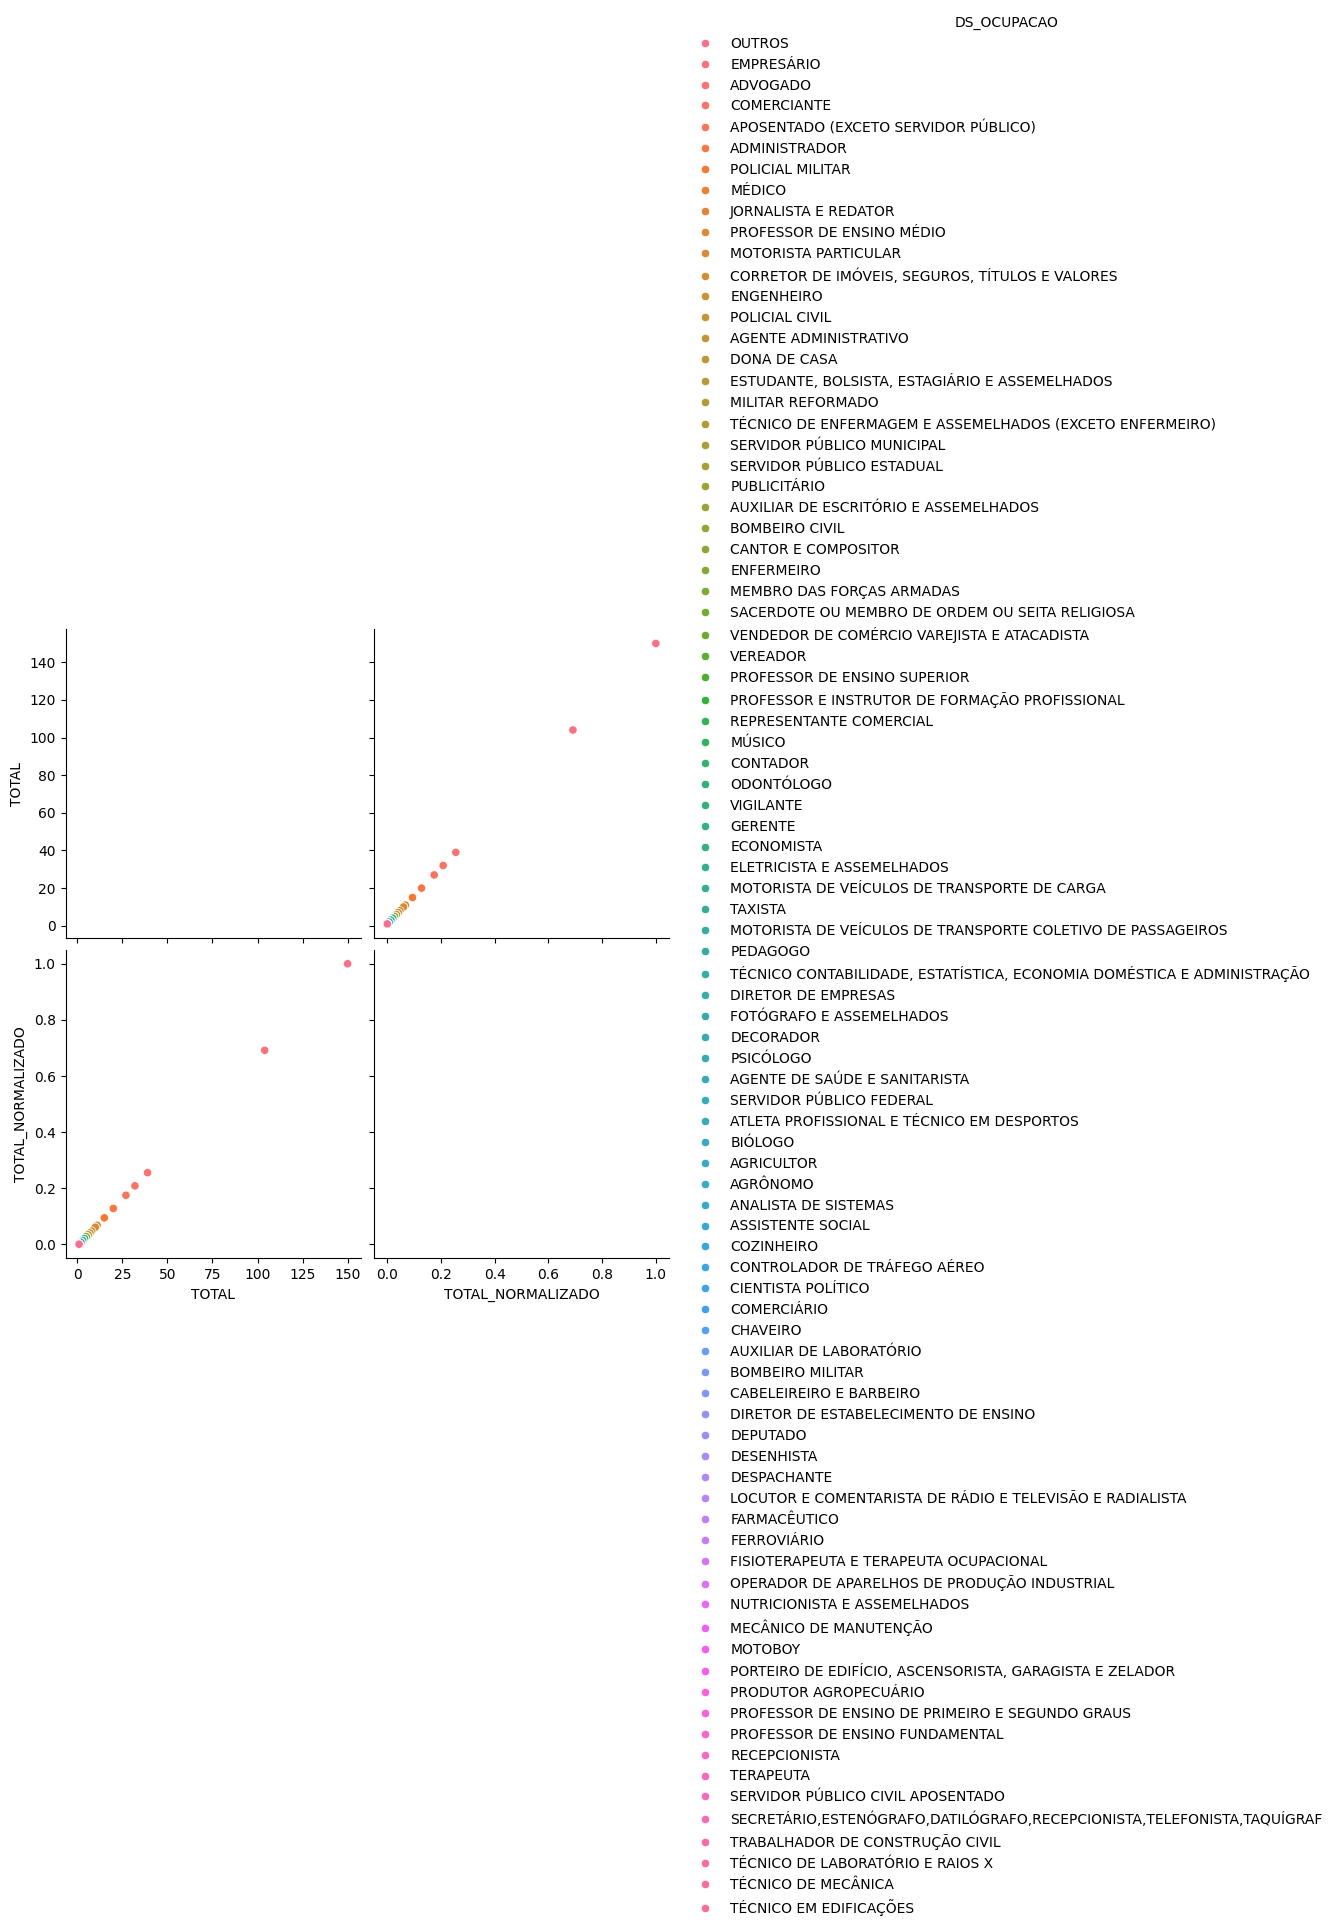

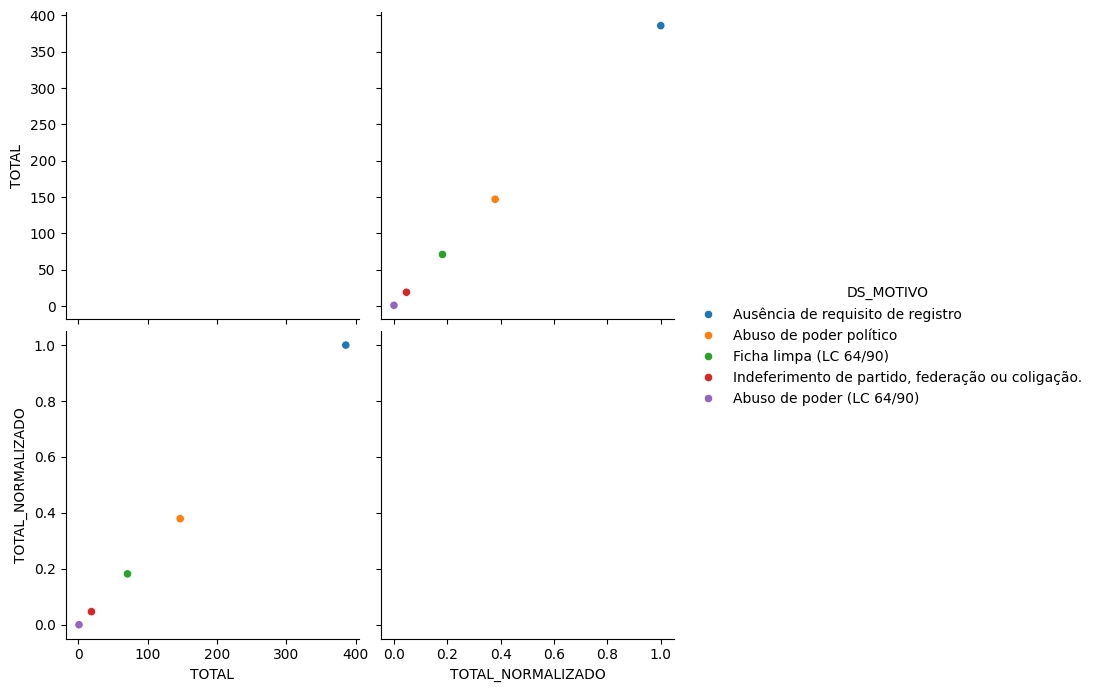

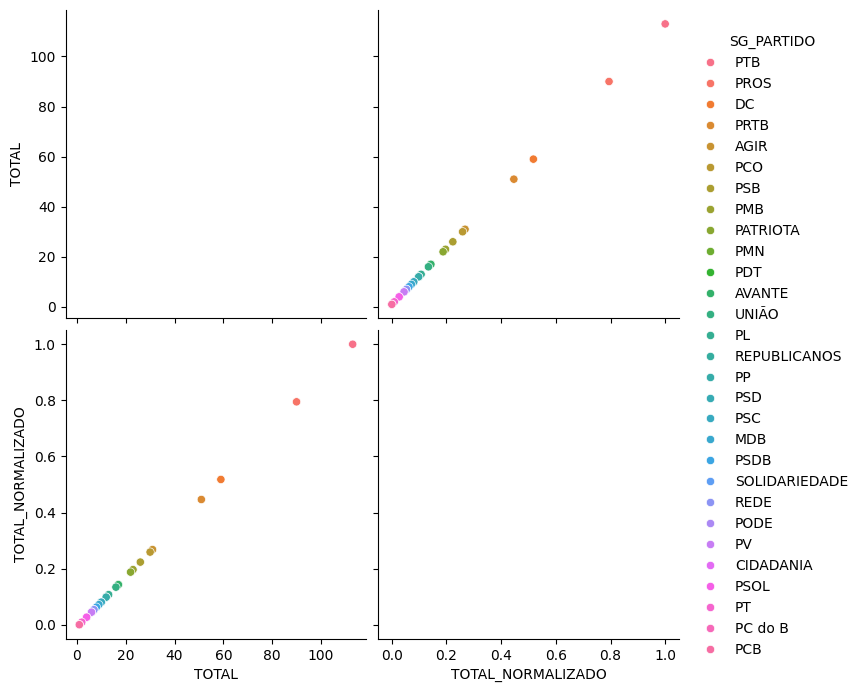

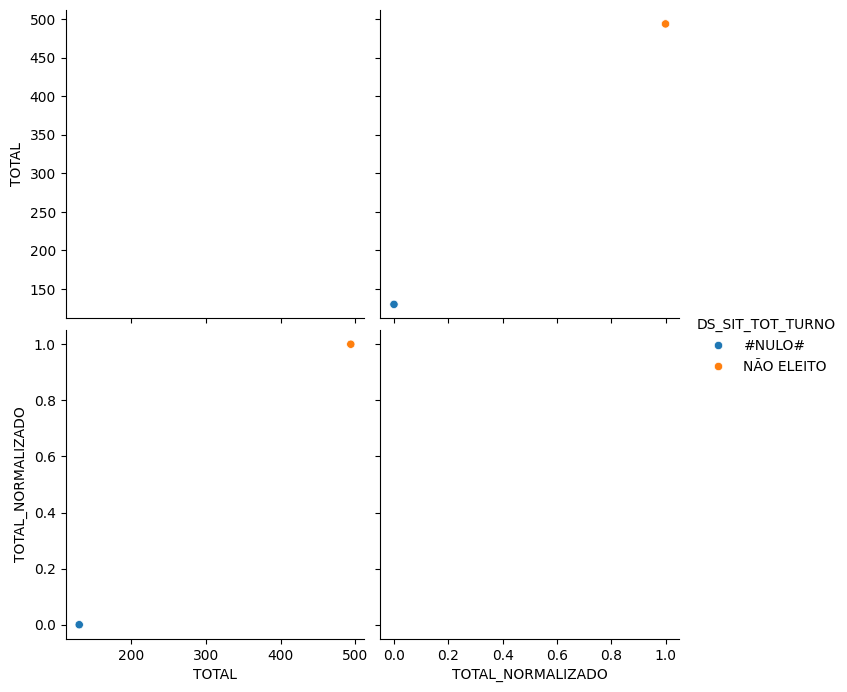

In [169]:
# matriz de gráficos scatter 
sns.pairplot(cassacoes_por_estado, hue='SG_UF', height=3.5)
sns.pairplot(cassacoes_por_instrucao, hue='DS_GRAU_INSTRUCAO', height=3.5)
sns.pairplot(cassacoes_por_ocupacao, hue='DS_OCUPACAO', height=3.5)
sns.pairplot(cassacoes_por_motivo, hue='DS_MOTIVO', height=3.5)
sns.pairplot(cassacoes_por_partido, hue='SG_PARTIDO', height=3.5)
sns.pairplot(cassacoes_por_turno, hue='DS_SIT_TOT_TURNO', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

In [157]:
# # define o scatter plot
# sns.lmplot(x='comprimento_sepala', y='largura_sepala', data=df_dataset, 
#            fit_reg=False,  
#            hue='classe')

# # cria um título para o gráfico
# plt.title('Comprimento vs largura da sepala')

# # mostra o gráfico
# plt.show()

NameError: name 'df_dataset' is not defined

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

Index(['SG_PARTIDO', 'TOTAL', 'TOTAL_NORMALIZADO'], dtype='object')


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

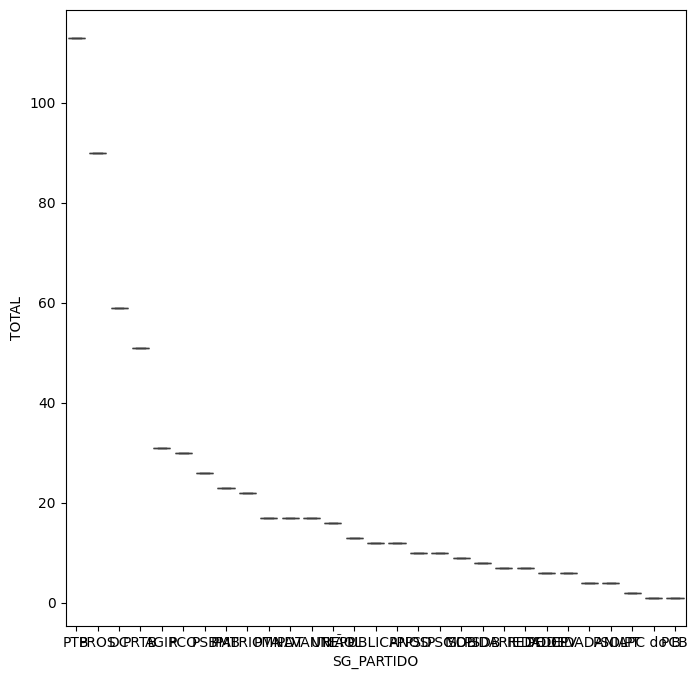

In [173]:
# for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
print(cassacoes_por_partido.columns)
plt.figure(figsize=(8,8))

# cria o boxplot
sns.boxplot(x="SG_PARTIDO", y='TOTAL', data=cassacoes_por_partido, whis=1.5)

# mostra o gráfico
plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

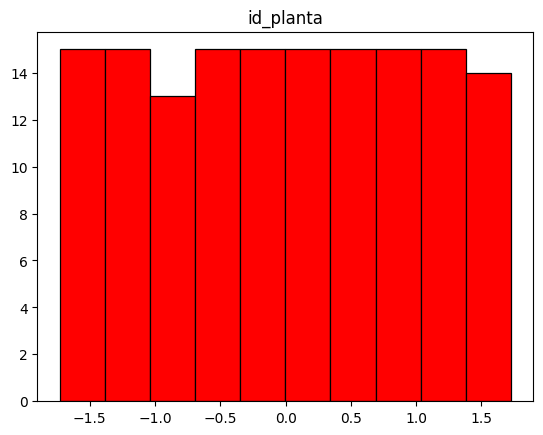

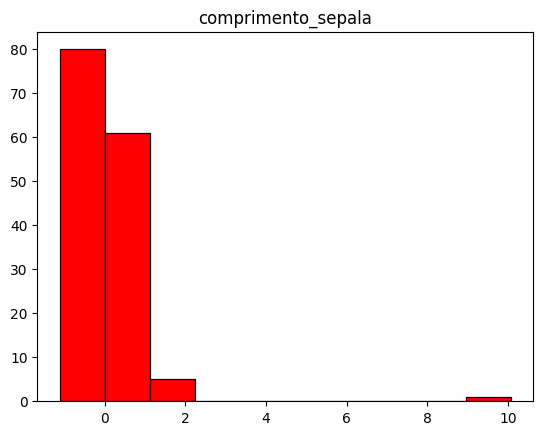

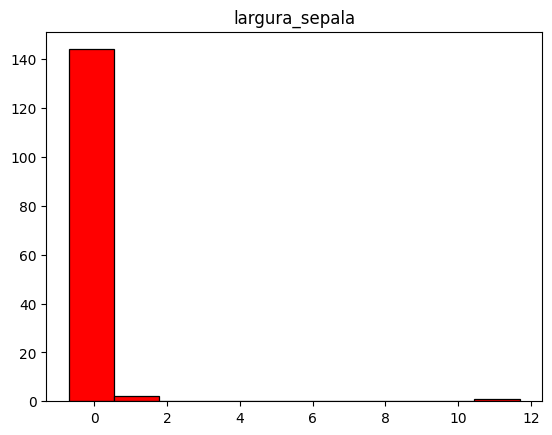

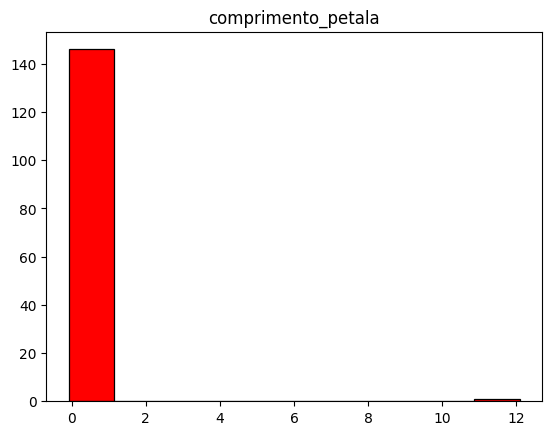

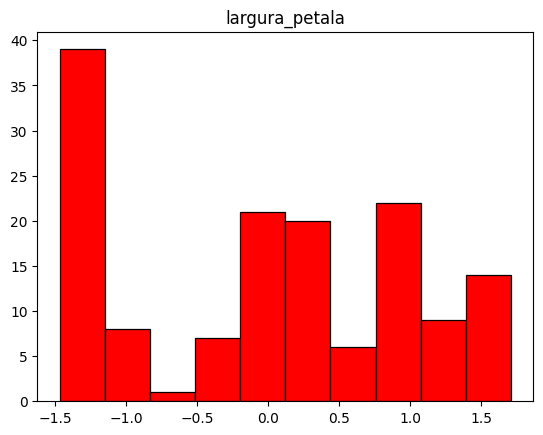

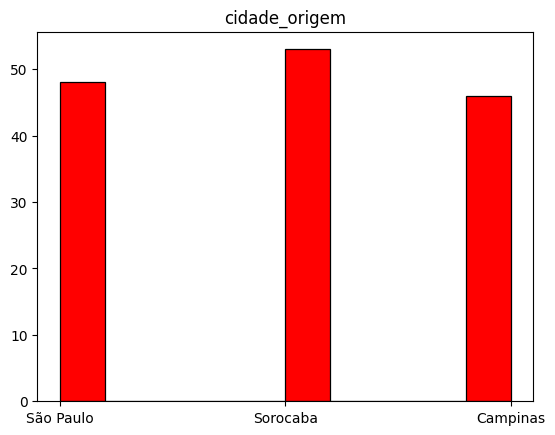

In [19]:
for atributo in df_dataset.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Nos histogramas, os *outliers* mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

### **Exercício**

7. Remova as instâncias consideradas outliers do dataset. Vamos considerar como outliers valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$. Utilize como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

In [20]:
#Remova outliers aqui
atributos_numericos = df_dataset.select_dtypes(include=['float64', 'int64']).columns

Q1 = df_dataset[atributos_numericos].quantile(0.25)
Q3 = df_dataset[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = df_dataset[~((df_dataset[atributos_numericos] < limite_inferior) | (df_dataset[atributos_numericos] > limite_superior)).any(axis=1)]



Depois da remoção, se analizarmos o box plot e os gráficos de dispersão deveremos observar que não há mais nenhum *outlier* na base de dados. 

Abaixo vamos plotar os gráficos novamente.

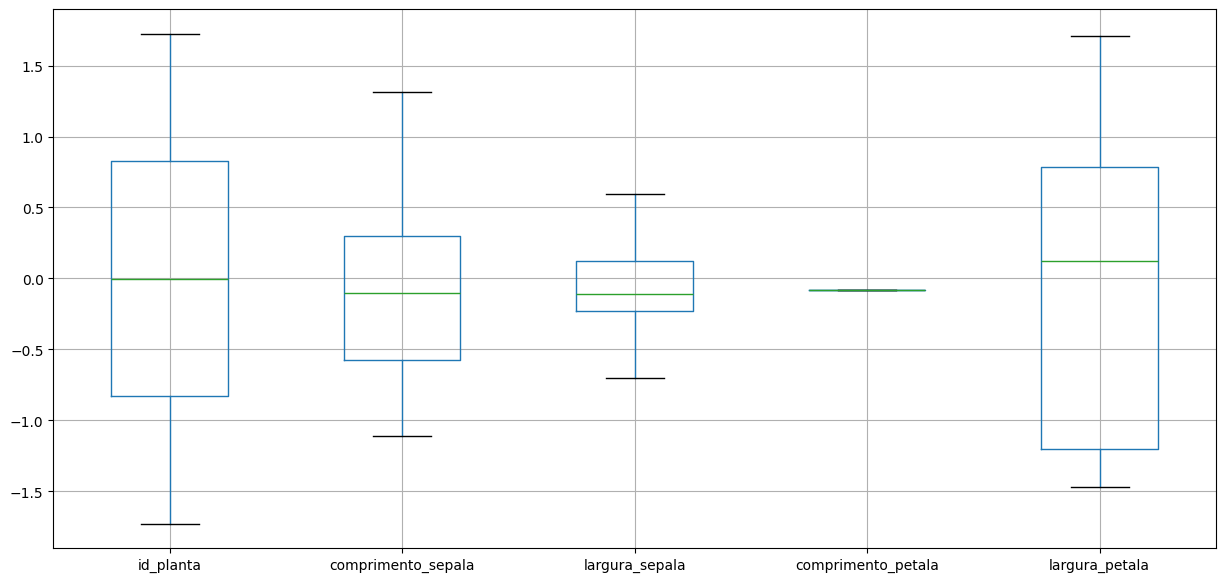

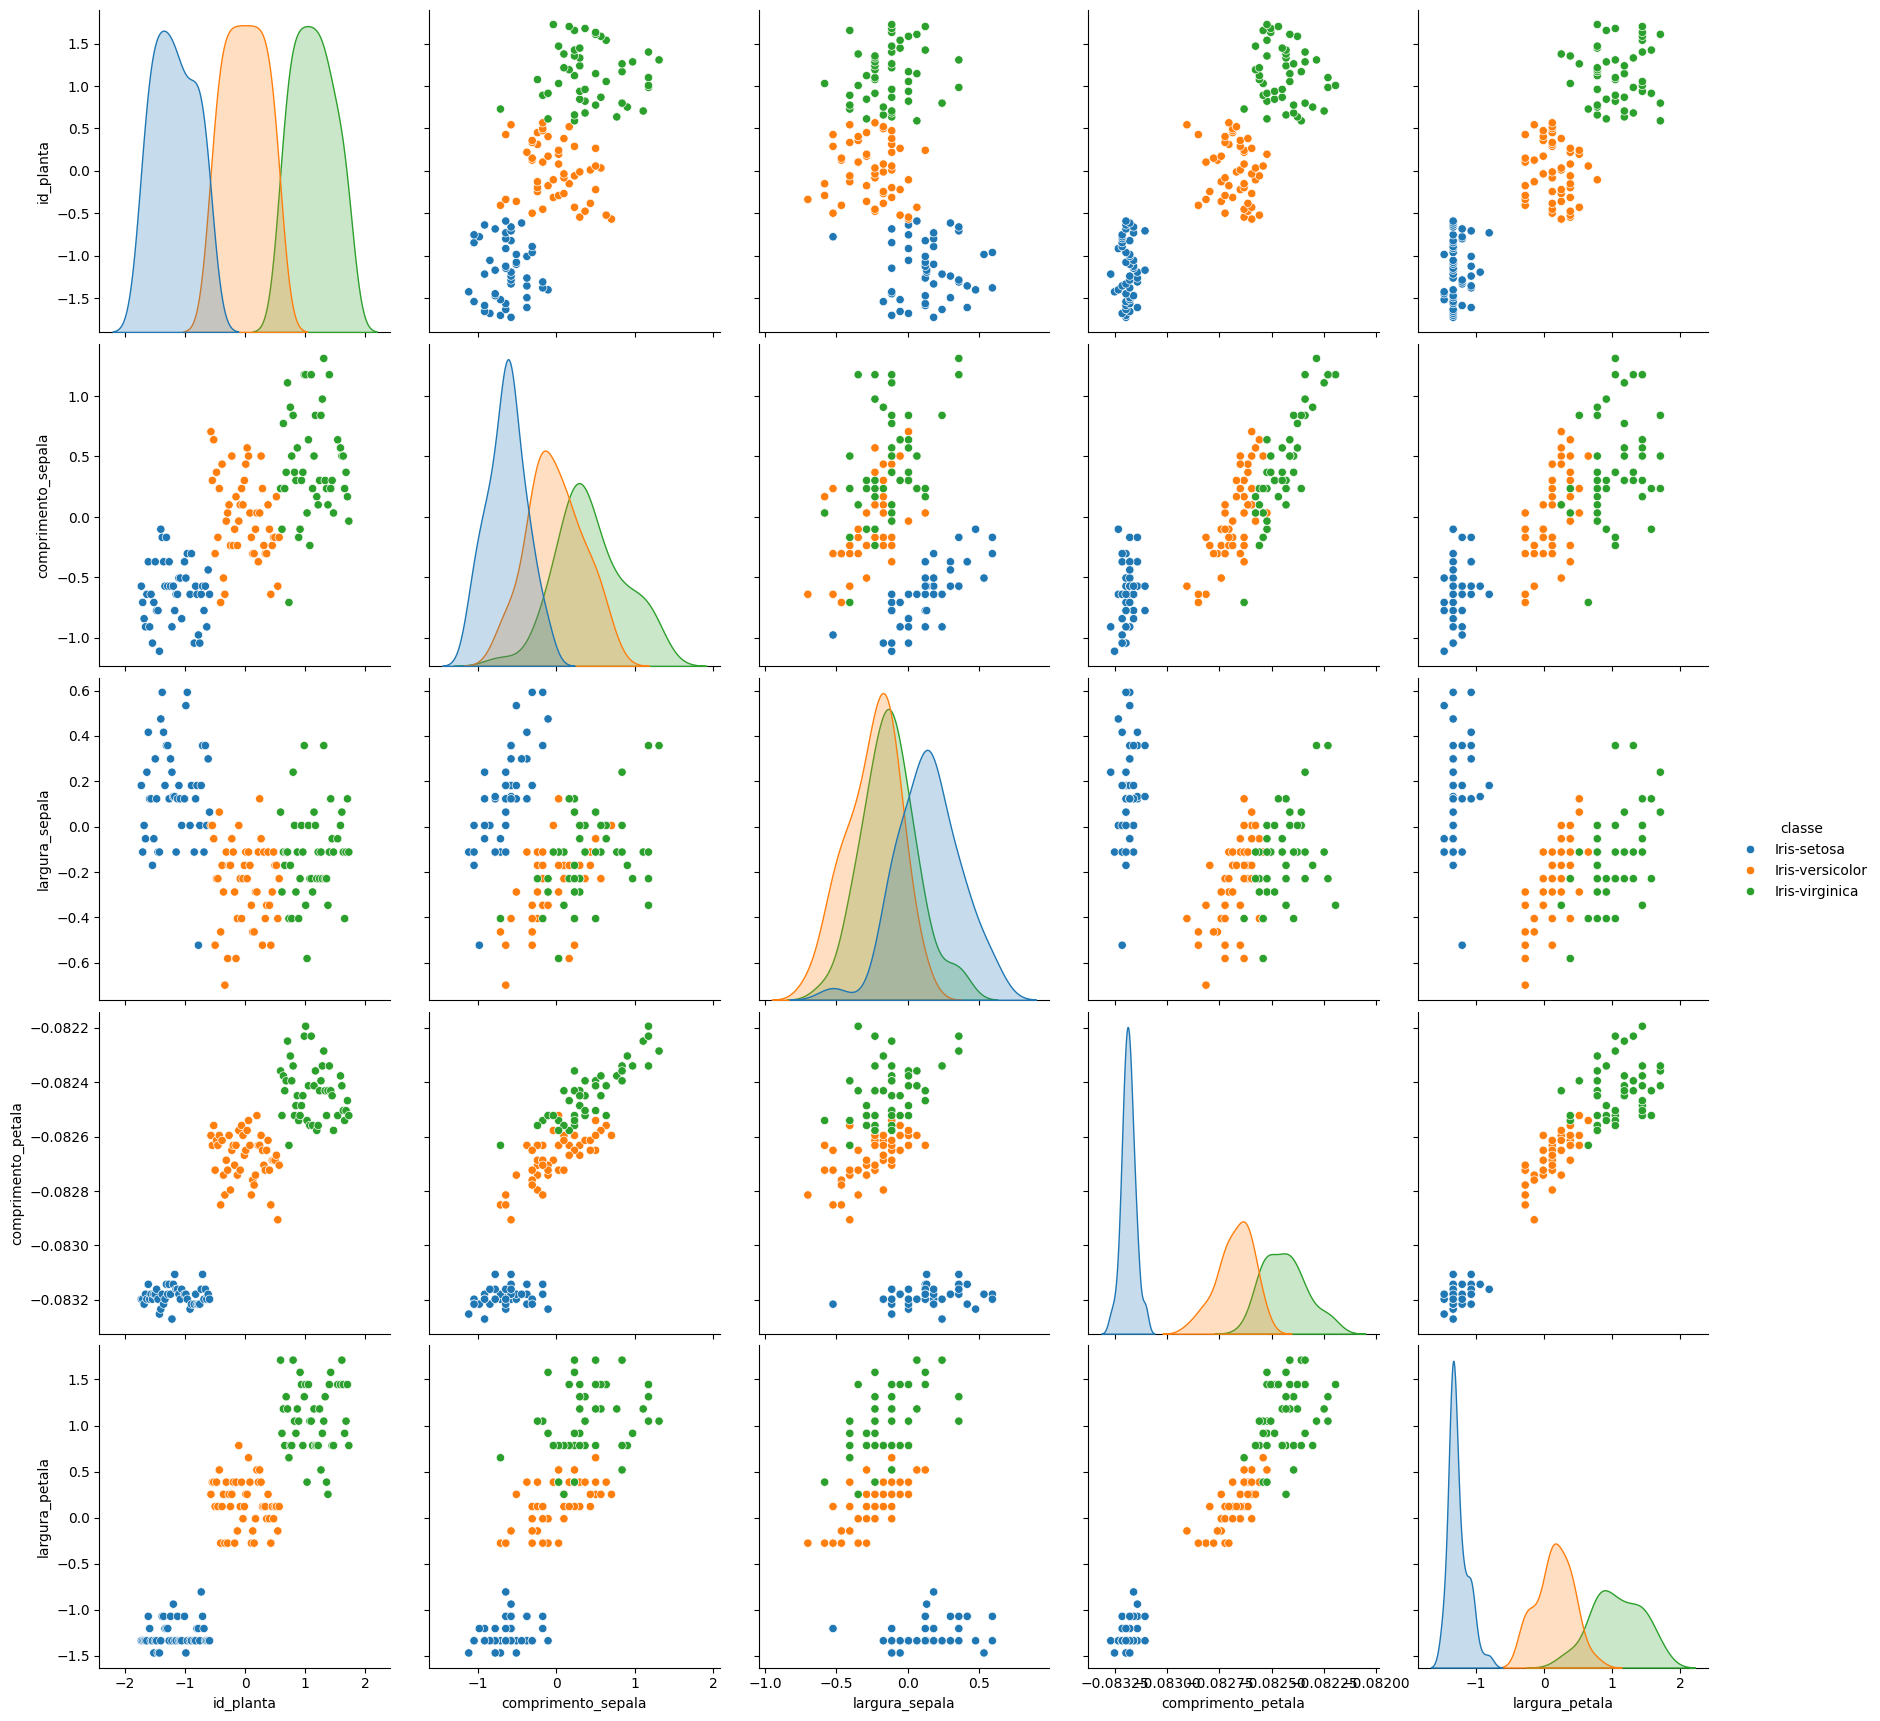

In [21]:
# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 


## Distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

classe
Iris-versicolor    50
Iris-setosa        47
Iris-virginica     47
Name: count, dtype: int64


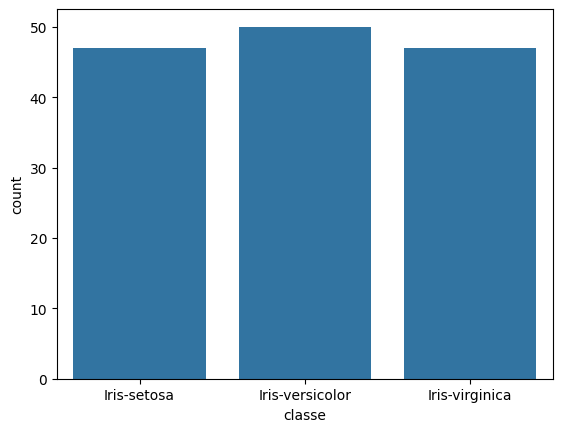

In [24]:
print( df_dataset['classe'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

Conforme podemos ver acima, as 3 classes possuem aproximadamente 50 instâncias cada uma, ou seja, temos um dataset balanceado. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando as funções nativas de correlação e covariância da bilioteca `Pandas`.

In [23]:
# matriz de covariancia
df_covariance = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].cov()

# matriz de correlação
df_correlation = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


,comprimento_sepala,comprimento_petala,largura_sepala,largura_petala
comprimento_sepala,0.308917,1.546725e-04,-0.016296,0.448538
comprimento_petala,0.000155,1.027346e-07,-0.000035,0.000307
largura_sepala,-0.016296,-3.531331e-05,0.066183,-0.093593
largura_petala,0.448538,3.065217e-04,-0.093593,0.988270




Matriz de correlação: 


,comprimento_sepala,comprimento_petala,largura_sepala,largura_petala
comprimento_sepala,1.000000,0.868228,-0.113970,0.811785
comprimento_petala,0.868228,1.000000,-0.428259,0.961978
largura_sepala,-0.113970,-0.428259,1.000000,-0.365960
largura_petala,0.811785,0.961978,-0.365960,1.000000


Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância e alta correlação. Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em <http://www.tylervigen.com/spurious-correlations>.

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] Faceli, Katti, et al. Inteligência artificial: uma abordagem de aprendizado de máquina. (2021).
---